In [501]:
# Import Needy Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot

In [502]:
# Check the files

!ls raw_data

clinicaltrial_data.csv
mouse_drug_data.csv


In [503]:
# Determine the paths

path1 = './raw_data/clinicaltrial_data.csv'
path2 = './raw_data/mouse_drug_data.csv'

In [504]:
# Read the files

data_clinic = pd.read_csv(path1)
data_clinic.size

7572

In [505]:
data_drug = pd.read_csv(path2)
data_drug.size

500

In [506]:
# Merge the files 

data_merged = pd.merge(data_clinic, data_drug, on = 'Mouse ID')
data_merged.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [507]:
# Filter the file by Drug Name and Timepin with Meanof Tumor Volume

drug_response = pd.DataFrame(data_merged.groupby(['Drug', 'Timepoint']).mean()['Tumor Volume (mm3)'])
drug_response.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [508]:
# Set Timepoint as index and Drug names as columns 

drug_response = drug_response.reset_index()
drug_response_reset = drug_response.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]
drug_response_reset

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


TO DO LIST:
* Creating a scatter plot that shows how the tumor volume changes over time for each treatment.
* Creating a scatter plot that shows how the number of [metastatic](https://en.wikipedia.org/wiki/Metastasis) (cancer spreading) sites changes over time for each treatment.
* Creating a scatter plot that shows the number of mice still alive through the course of treatment (Survival Rate)
* Creating a bar graph that compares the total % tumor volume change for each drug across the full 45 days.

## Tumor Response to Treatment

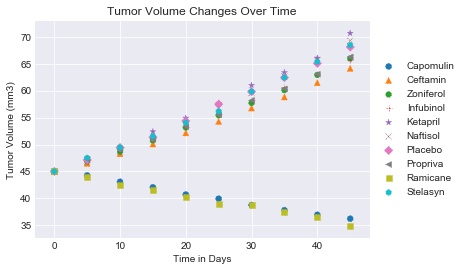

In [509]:
# Call each drug name to plot

plt.pyplot.scatter(drug_response_reset.index, drug_response_reset['Capomulin'], marker="o", linestyle="dashed", linewidth=0.50)
plt.pyplot.scatter(drug_response_reset.index, drug_response_reset['Ceftamin'], marker="^", linestyle="dashed", linewidth=0.50)
plt.pyplot.scatter(drug_response_reset.index, drug_response_reset['Zoniferol'], marker="8",  linestyle="dashed", linewidth=0.50)
plt.pyplot.scatter(drug_response_reset.index, drug_response_reset['Infubinol'], marker="+", linestyle="dashed", linewidth=0.50)
plt.pyplot.scatter(drug_response_reset.index, drug_response_reset['Ketapril'], marker="*", linestyle="dashed", linewidth=0.50)
plt.pyplot.scatter(drug_response_reset.index, drug_response_reset['Naftisol'], marker="x",  linestyle="dashed", linewidth=0.50)
plt.pyplot.scatter(drug_response_reset.index, drug_response_reset['Placebo'], marker="D",  linestyle="dashed", linewidth=0.50)
plt.pyplot.scatter(drug_response_reset.index, drug_response_reset['Propriva'], marker="<",  linestyle="dashed", linewidth=0.50)
plt.pyplot.scatter(drug_response_reset.index, drug_response_reset['Ramicane'], marker="s", linestyle="dashed", linewidth=0.50)
plt.pyplot.scatter(drug_response_reset.index, drug_response_reset['Stelasyn'], marker="h",  linestyle="dashed", linewidth=0.50)

plt.pyplot.title('Tumor Volume Changes Over Time')
plt.pyplot.xlabel('Time in Days')
plt.pyplot.ylabel('Tumor Volume (mm3)')

plt.pyplot.style.use('seaborn-darkgrid')
plt.pyplot.legend(loc='center left', bbox_to_anchor=(1, 0.5), fancybox = True)

plt.pyplot.savefig('Tumor_Volume_Changes_Over_Time.png', bbox_inches="tight")
plt.pyplot.show()

## Metastatic Response to Treatment

In [510]:
data_merged.head(1)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin


In [511]:
# Filter the merged data by Drug and Timepoint for Metastatic Sites average 

drug_metas = pd.DataFrame(data_merged.groupby(['Drug', 'Timepoint']).mean()['Metastatic Sites'])
drug_metas.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [512]:
# Set timepoint as index and Drug names as columns

drug_metas = drug_metas.reset_index()
drug_metas_reset = drug_metas.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]
drug_metas_reset

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


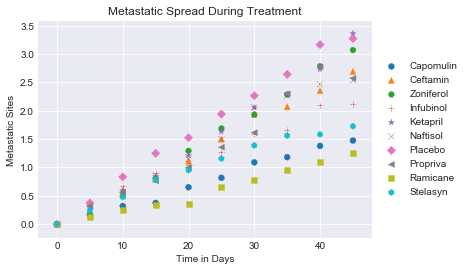

In [513]:
# Call each drug name to plot 

plt.pyplot.scatter(drug_metas_reset.index, drug_metas_reset['Capomulin'], marker="o", linestyle="dashed", linewidth=0.50)
plt.pyplot.scatter(drug_metas_reset.index, drug_metas_reset['Ceftamin'], marker="^", linestyle="dashed", linewidth=0.50)
plt.pyplot.scatter(drug_metas_reset.index, drug_metas_reset['Zoniferol'], marker="8",  linestyle="dashed", linewidth=0.50)
plt.pyplot.scatter(drug_metas_reset.index, drug_metas_reset['Infubinol'], marker="+", linestyle="dashed", linewidth=0.50)
plt.pyplot.scatter(drug_metas_reset.index, drug_metas_reset['Ketapril'], marker="*", linestyle="dashed", linewidth=0.50)
plt.pyplot.scatter(drug_metas_reset.index, drug_metas_reset['Naftisol'], marker="x",  linestyle="dashed", linewidth=0.50)
plt.pyplot.scatter(drug_metas_reset.index, drug_metas_reset['Placebo'], marker="D",  linestyle="dashed", linewidth=0.50)
plt.pyplot.scatter(drug_metas_reset.index, drug_metas_reset['Propriva'], marker="<",  linestyle="dashed", linewidth=0.50)
plt.pyplot.scatter(drug_metas_reset.index, drug_metas_reset['Ramicane'], marker="s", linestyle="dashed", linewidth=0.50)
plt.pyplot.scatter(drug_metas_reset.index, drug_metas_reset['Stelasyn'], marker="h",  linestyle="dashed", linewidth=0.50)

plt.pyplot.title('Metastatic Spread During Treatment')
plt.pyplot.xlabel('Time in Days')
plt.pyplot.ylabel('Metastatic Sites')

plt.pyplot.style.use('seaborn-darkgrid')
plt.pyplot.legend(loc='center left', bbox_to_anchor=(1, 0.5), fancybox = True)

plt.pyplot.savefig('Metastatic_Spread_During_Treatment.png', bbox_inches="tight")
plt.pyplot.show()

## Survival Rates

In [514]:
data_merged.head(1)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin


In [515]:
# Filter Drug names and Timepoint with Tumor Volume mean for mouse count

survival_data = data_merged.groupby(['Drug', 'Timepoint']).count()['Tumor Volume (mm3)']
survival_data = pd.DataFrame({'Mouse Count': survival_data})
survival_data.head()

Mause Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [516]:
# Set timepoint as index and Drug as columns 

survival_data = survival_data.reset_index()
survival_data_reset = survival_data.pivot(index='Timepoint', columns = 'Drug')['Mause Count']
survival_data_reset

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


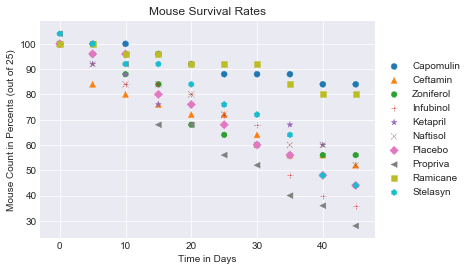

In [517]:
# Plot each drug for survavial rate 

plt.pyplot.scatter(survival_data_reset.index, 100*survival_data_reset['Capomulin']/25, marker="o", linestyle="dashed", linewidth=0.50)
plt.pyplot.scatter(survival_data_reset.index, 100*survival_data_reset['Ceftamin']/25, marker="^", linestyle="dashed", linewidth=0.50)
plt.pyplot.scatter(survival_data_reset.index, 100*survival_data_reset['Zoniferol']/25, marker="8",  linestyle="dashed", linewidth=0.50)
plt.pyplot.scatter(survival_data_reset.index, 100*survival_data_reset['Infubinol']/25, marker="+", linestyle="dashed", linewidth=0.50)
plt.pyplot.scatter(survival_data_reset.index, 100*survival_data_reset['Ketapril']/25, marker="*", linestyle="dashed", linewidth=0.50)
plt.pyplot.scatter(survival_data_reset.index, 100*survival_data_reset['Naftisol']/25, marker="x",  linestyle="dashed", linewidth=0.50)
plt.pyplot.scatter(survival_data_reset.index, 100*survival_data_reset['Placebo']/25, marker="D",  linestyle="dashed", linewidth=0.50)
plt.pyplot.scatter(survival_data_reset.index, 100*survival_data_reset['Propriva']/25, marker="<",  linestyle="dashed", linewidth=0.50)
plt.pyplot.scatter(survival_data_reset.index, 100*survival_data_reset['Ramicane']/25, marker="s", linestyle="dashed", linewidth=0.50)
plt.pyplot.scatter(survival_data_reset.index, 100*survival_data_reset['Stelasyn']/25, marker="h",  linestyle="dashed", linewidth=0.50)

plt.pyplot.title('Mouse Survival Rates')
plt.pyplot.xlabel('Time in Days')
plt.pyplot.ylabel('Mouse Count in Percents (out of 25)')

plt.pyplot.style.use('seaborn-darkgrid')
plt.pyplot.legend(loc='center left', bbox_to_anchor=(1, 0.5), fancybox = True)

plt.pyplot.savefig('Mouse_Survival_Rates.png', bbox_inches="tight")
plt.pyplot.show()

## Summary

In [518]:
# Convert each drug response into percents -- for their success of failure 

percent_change = 100*(drug_response_reset.iloc[-1]-drug_response_reset.iloc[0]) / drug_response_reset.iloc[0]
percent_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [520]:
# For Bar Plot collect needed elements 

# Store all Relevant Percent Changes into a Tuple

percents = (percent_change["Capomulin"], 
               percent_change["Ceftamin"], 
               percent_change["Infubinol"], 
               percent_change["Ketapril"],
               percent_change["Naftisol"], 
               percent_change["Placebo"], 
               percent_change["Propriva"],
               percent_change["Ramicane"], 
               percent_change["Stelasyn"], 
               percent_change["Zoniferol"])

In [521]:
# Splice the data between passing and failing drugs
fig, ax = plt.pyplot.subplots()
ind = np.arange(len(percents))  
width = 1
Pass = ax.bar(ind[0], percents[0], width, color='green')
Pass2 = ax.bar(ind[7], pct_changes[7], width, color='green')
Fail = ax.bar(ind[1:7], percents[1:7], width, color='red')
Fail2 = ax.bar(ind[8:], percents[8:], width, color='red')

In [522]:
# Orient widths. Add labels, tick marks, etc. 
ax.set_ylabel('% Tumor Volume Change')
ax.set_title('Tumor Change Over 45 Day Treatment')
ax.set_xticks(ind + 0.5)
ax.set_xticklabels(('Capomulin','Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo','Propriva', 
                    'Ramicane', 'Stelasyn', 'Zoniferol'), rotation = 'vertical')

ax.set_autoscaley_on(False)
ax.set_ylim([-30,70])
ax.grid(True)

In [523]:
# Use functions to label the percentages of changes
def autolabelFail(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 3,
                '%d%%' % int(height),
                ha='center', va='bottom', color="black")

In [524]:
def autolabelFail2(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 3,
                '%d%%' % int(height),
                ha='center', va='bottom', color="black")

In [525]:
def autolabelPass(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., -8,
                '-%d%% ' % int(height),
                ha='center', va='bottom', color="black")

In [526]:
def autolabelPass2(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., -8,
                '-%d%% ' % int(height),
                ha='center', va='bottom', color="black")

In [527]:
# Call functions to implement the function calls
autolabelPass(Pass)
autolabelPass2(Pass2)
autolabelFail(Fail)
autolabelFail2(Fail2)

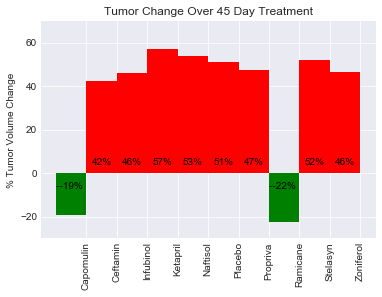

In [528]:
# Save the Figure
plt.pyplot.savefig("Tumor_Volume_Change.png", bbox_inches="tight")
plt.pyplot.show()